In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [9]:
emissions_UE = pd.read_csv("emissions_ges_prod_UE.csv", sep =";")

In [10]:
emissions_UE

,Date,Pays,Filière,Valeur (Mt)
0,2016-01,Autriche,Dechets,"0,127224"
1,2016-02,Autriche,Dechets,"0,059508"
2,2016-03,Autriche,Dechets,"0,063612"
3,2016-04,Autriche,Dechets,"0,06156"
4,2016-05,Autriche,Dechets,"0,063612"
...,...,...,...,...
29299,2024-11,Slovaquie,Emissions,"0,25"
29300,2024-12,Slovaquie,Emissions,"0,25"
29301,2025-01,Slovaquie,Emissions,"0,26"
29302,2025-02,Slovaquie,Emissions,"0,24"


In [16]:
em_fr = emissions_UE[emissions_UE['Pays'].str.contains('France')]

In [17]:
em_fr

,Date,Pays,Filière,Valeur (Mt)
10989,2016-01,France,Dechets,"0,18477707391897"
10990,2016-02,France,Dechets,"0,16990121994531"
10991,2016-03,France,Dechets,"0,18160156420042"
10992,2016-04,France,Dechets,"0,15091028345052"
10993,2016-05,France,Dechets,"0,15662967518466"
...,...,...,...,...
12205,2024-11,France,Emissions,"1,41"
12206,2024-12,France,Emissions,"1,41"
12207,2025-01,France,Emissions,"1,61"
12208,2025-02,France,Emissions,"1,44"


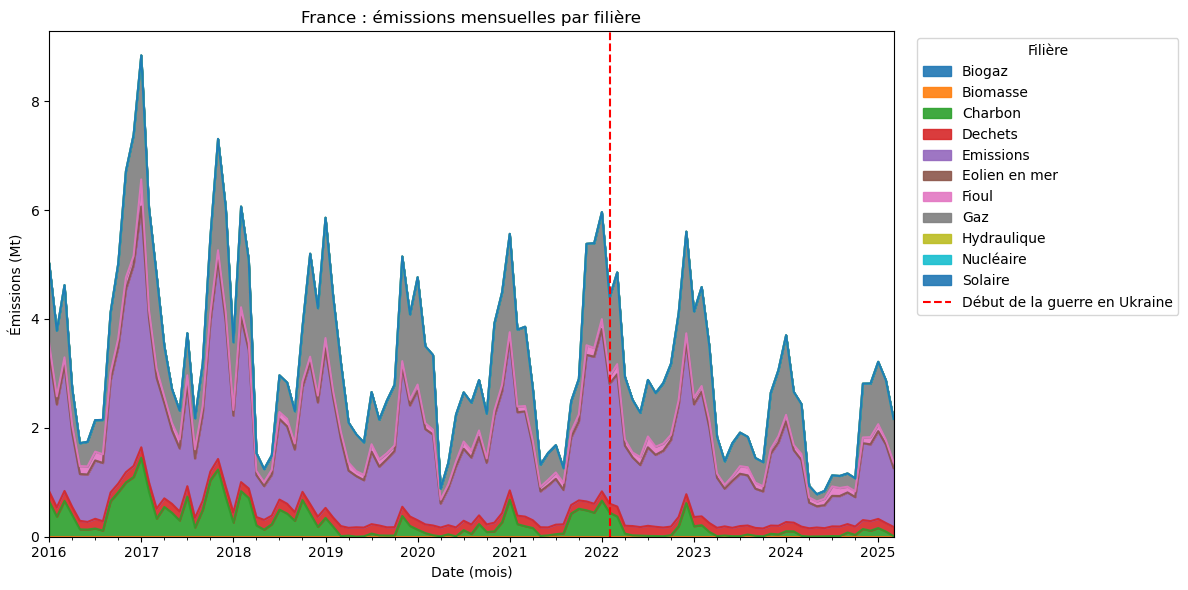

In [ ]:


# Sous-ensemble France + nettoyage des types
df_fr = emissions_UE[emissions_UE["Pays"] == "France"].copy()

# Date → datetime (index temporel propre)
df_fr["Date"] = pd.to_datetime(df_fr["Date"], format="%Y-%m")

# Valeur → numérique (remplace la virgule par un point si besoin)
df_fr["Valeur (Mt)"] = (
    df_fr["Valeur (Mt)"]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .str.replace(r"\s+", "", regex=True)
        .astype(float)
)

# Agrégation mensuelle par filière
pivot = (
    df_fr
      .groupby(["Date", "Filière"])["Valeur (Mt)"]
      .sum()
      .unstack("Filière")           # chaque filière devient une colonne
      .fillna(0)                    # évite les NaN au tracé
      .sort_index()                 # dates dans l’ordre chronologique
)

date_guerre_ukraine = pd.to_datetime('2022-02-24')  # Date de début de la guerre en Ukraine

#  Tracé : zone empilée
ax = pivot.plot(
    kind="area",
    stacked=True,
    figsize=(12, 6),
    alpha=0.9                       # légère transparence, lisibilité accrue
)
ax.axvline(x=date_guerre_ukraine, color='red', linestyle='--', label="Début de la guerre en Ukraine")
ax.set_xlabel("Date (mois)")
ax.set_ylabel("Émissions (Mt)")
ax.set_title("France : émissions mensuelles par filière")
ax.legend(title="Filière", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


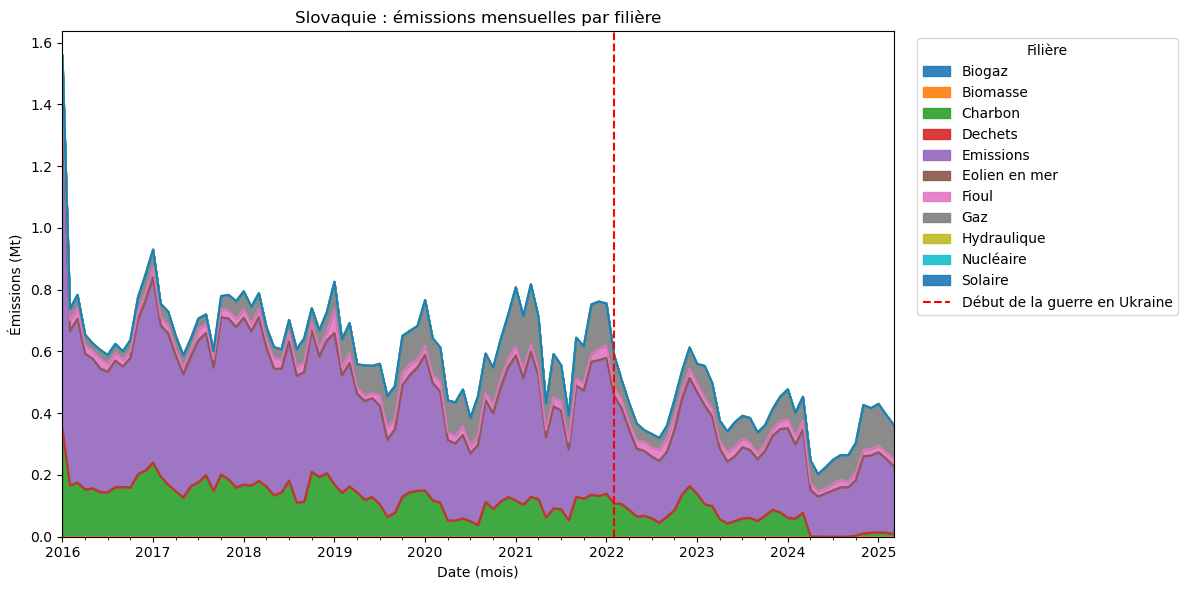

In [ ]:


#  Sous-ensemble France + nettoyage des types
df_sk = emissions_UE[emissions_UE["Pays"] == "Slovaquie"].copy()

# Date → datetime (index temporel propre)
df_sk["Date"] = pd.to_datetime(df_sk["Date"], format="%Y-%m")

# Valeur → numérique (remplace la virgule par un point si besoin)
df_sk["Valeur (Mt)"] = (
    df_sk["Valeur (Mt)"]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .str.replace(r"\s+", "", regex=True)
        .astype(float)
)

#  Agrégation mensuelle par filière
pivot_sk = (
    df_sk
      .groupby(["Date", "Filière"])["Valeur (Mt)"]
      .sum()
      .unstack("Filière")           # chaque filière devient une colonne
      .fillna(0)                    # évite les NaN au tracé
      .sort_index()                 # dates dans l’ordre chronologique
)

# Tracé : zone empilée
ax = pivot_sk.plot(
    kind="area",
    stacked=True,
    figsize=(12, 6),
    alpha=0.9                       # légère transparence, lisibilité accrue
)
ax.axvline(x=date_guerre_ukraine, color='red', linestyle='--', label="Début de la guerre en Ukraine")
ax.set_xlabel("Date (mois)")
ax.set_ylabel("Émissions (Mt)")
ax.set_title("Slovaquie : émissions mensuelles par filière")
ax.legend(title="Filière", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


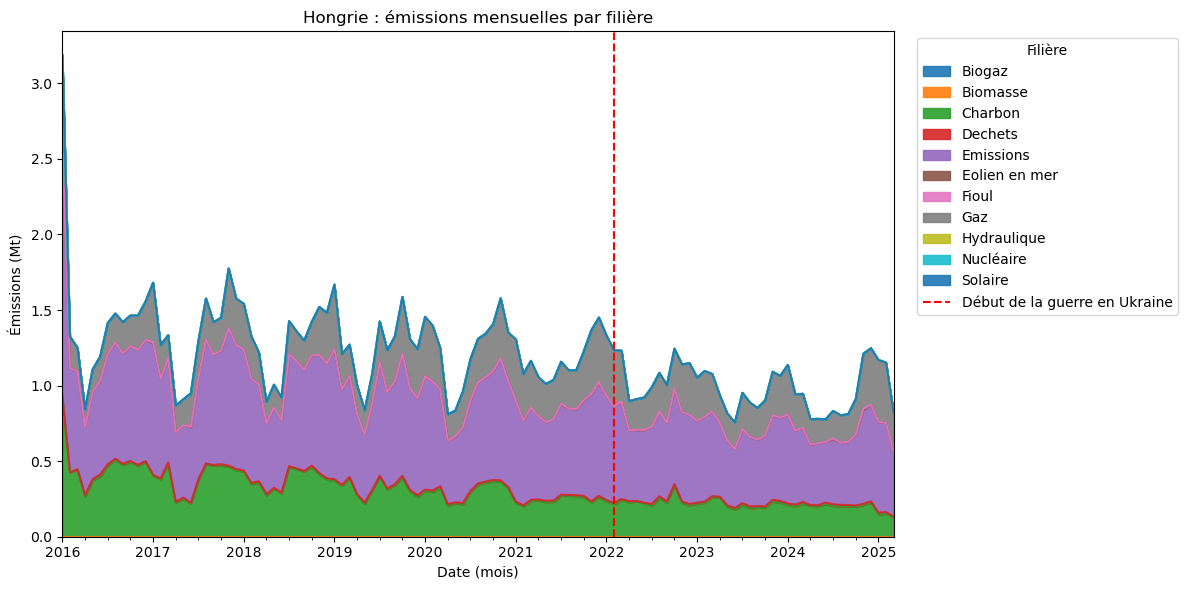

In [ ]:


# Sous-ensemble France + nettoyage des types
df_hu = emissions_UE[emissions_UE["Pays"] == "Hongrie"].copy()

# Date → datetime (index temporel propre)
df_hu["Date"] = pd.to_datetime(df_hu["Date"], format="%Y-%m")

# Valeur → numérique (remplace la virgule par un point si besoin)
df_hu["Valeur (Mt)"] = (
    df_hu["Valeur (Mt)"]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .str.replace(r"\s+", "", regex=True)
        .astype(float)
)

#  Agrégation mensuelle par filière
pivot_hu = (
    df_hu
      .groupby(["Date", "Filière"])["Valeur (Mt)"]
      .sum()
      .unstack("Filière")           # chaque filière devient une colonne
      .fillna(0)                    # évite les NaN au tracé
      .sort_index()                 # dates dans l’ordre chronologique
)

# Tracé : zone empilée
ax = pivot_hu.plot(
    kind="area",
    stacked=True,
    figsize=(12, 6),
    alpha=0.9                       # légère transparence, lisibilité accrue
)
ax.axvline(x=date_guerre_ukraine, color='red', linestyle='--', label="Début de la guerre en Ukraine")
ax.set_xlabel("Date (mois)")
ax.set_ylabel("Émissions (Mt)")
ax.set_title("Hongrie : émissions mensuelles par filière")
ax.legend(title="Filière", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


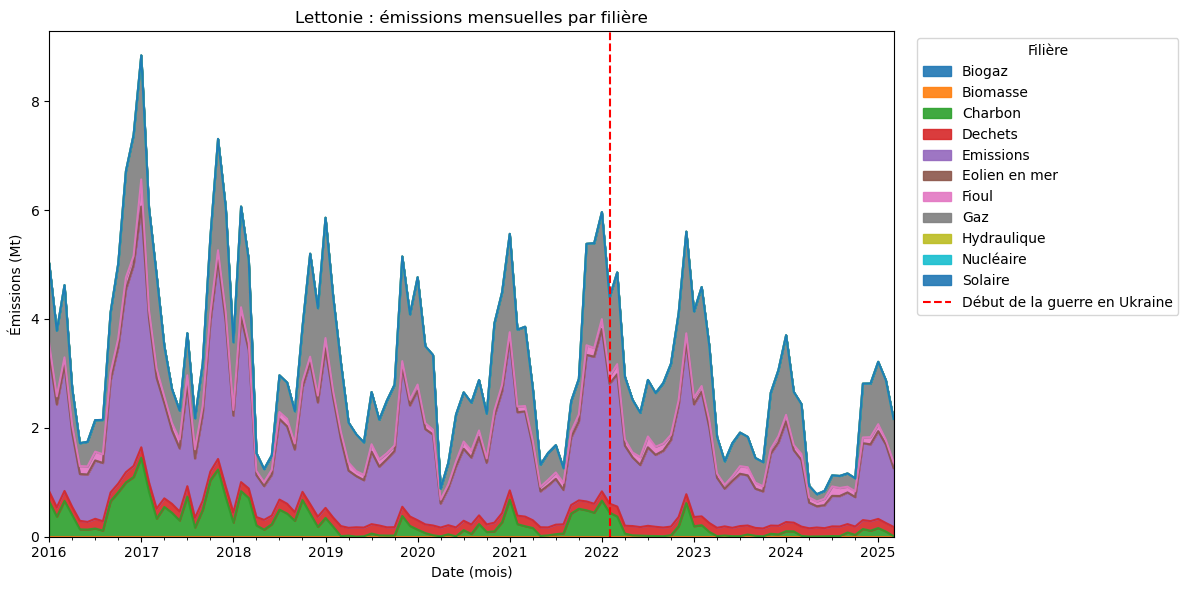

In [ ]:


# Sous-ensemble France + nettoyage des types
df_let = emissions_UE[emissions_UE["Pays"] == "France"].copy()

# Date → datetime (index temporel propre)
df_let["Date"] = pd.to_datetime(df_let["Date"], format="%Y-%m")

# Valeur → numérique (remplace la virgule par un point si besoin)
df_let["Valeur (Mt)"] = (
    df_let["Valeur (Mt)"]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .str.replace(r"\s+", "", regex=True)
        .astype(float)
)

#Agrégation mensuelle par filière
pivot_let = (
    df_fr
      .groupby(["Date", "Filière"])["Valeur (Mt)"]
      .sum()
      .unstack("Filière")           # chaque filière devient une colonne
      .fillna(0)                    # évite les NaN au tracé
      .sort_index()                 # dates dans l’ordre chronologique
)

#Tracé : zone empilée
ax = pivot_let.plot(
    kind="area",
    stacked=True,
    figsize=(12, 6),
    alpha=0.9                       # légère transparence, lisibilité accrue
)
ax.axvline(x=date_guerre_ukraine, color='red', linestyle='--', label="Début de la guerre en Ukraine")
ax.set_xlabel("Date (mois)")
ax.set_ylabel("Émissions (Mt)")
ax.set_title("Lettonie : émissions mensuelles par filière")
ax.legend(title="Filière", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()